### Generate data for train/test splits from SUNRGBD
1. Read 
2. Write
3. Split

In [53]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import os.path


In [55]:
nyudepthdir = os.path.join("data", "SUNRGBD", "kv1", "NYUdata")
nyuprefix = "NYU"
depthdir = "depth_bfx"
rgbdir = "image"
depthext = ".png"
rgbext = ".jpg"
imageNumbers = range(1, 1450) #1 to 1449

outputdir = os.path.join("data", "sunrgbd_nyu")

# Create filepaths to NYU dataset
counter = 0
for i in imageNumbers:
    ## 1. Read
    filename = nyuprefix+"{:04d}".format(i)
#     print(filename)
    # Extract depth map
    depthfile = os.path.join(nyudepthdir, 
                                 filename, 
                                     depthdir, 
                                         filename + depthext)
#     print(depthfile)
    depthImg = Image.open(depthfile)
    # Extract rgb image
    rgbfile = os.path.join(nyudepthdir,
                               filename, 
                                   rgbdir, 
                                       filename + rgbext)
#     print(rgbfile)
    rgbImg = Image.open(rgbfile)

    ## 3. Write
    counter += 1
    depthImg.save(os.path.join(outputdir, "{}_depth.png".format(counter)))
    rgbImg.save(os.path.join(outputdir, "{}_rgb.png".format(counter)))
    
print("Wrote {} image(s) to {}.".format(counter, outputdir))


KeyboardInterrupt: 

In [ ]:
## Train-Dev-Test Split
import random
import os.path

dataDir = os.path.join("data", "sunrgbd_nyu")

totalImg = counter
filenames = [("{}_depth.png".format(i), "{}_rgb.png".format(i)) for i in range(1, counter+1)]
random.seed(2018)
random.shuffle(filenames) # shuffles the ordering of filenames (deterministic given the chosen seed)

# 80-10-10 split
split_1 = int(0.8 * len(filenames))
split_2 = int(0.9 * len(filenames))
train_filenames = filenames[:split_1]
dev_filenames = filenames[split_1:split_2]
test_filenames = filenames[split_2:]

# Save to files
for name, split in zip(["train", "dev", "test"], [train_filenames, dev_filenames, test_filenames] ):
    with open(os.path.join(dataDir, "{}.txt".format(name)), "w") as f:
        for depth, rgb in split:
            f.write(depth + "," + rgb + "\n")
        

In [57]:
## Small set for overfitting
small_filenames = filenames[:5]
with open(os.path.join(dataDir, "{}.txt".format("small")), "w") as f:
    for depth, rgb in small_filenames:
        f.write(depth + "," + rgb + "\n")
    

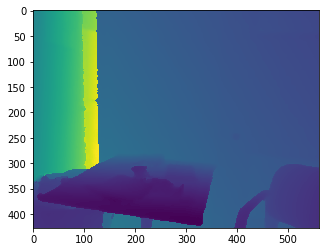

In [24]:
imshow(np.asarray(depthImg))

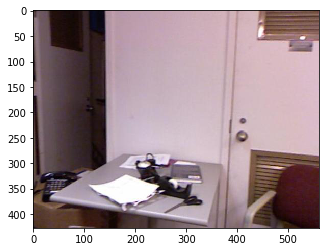

In [25]:
imshow(np.asarray(rgbImg))